In [1]:
from src.data_exploration import read_files_kpi2d, read_file_kpi3d, plot_kpi2d, plot_kpi3d

In [2]:
file_path = '/home/k64889/Masters-Thesis/data/raw/738561.68_PM180_HPIN_4layer_p4q2_doubleV_pitched_056_000007.xlsx'

Plot Exploration of a 2d KPI - Mgrenz

In [3]:
nn_kpi2d, mgrenz_kpi2d = read_files_kpi2d(file_path, 'Mgrenz')

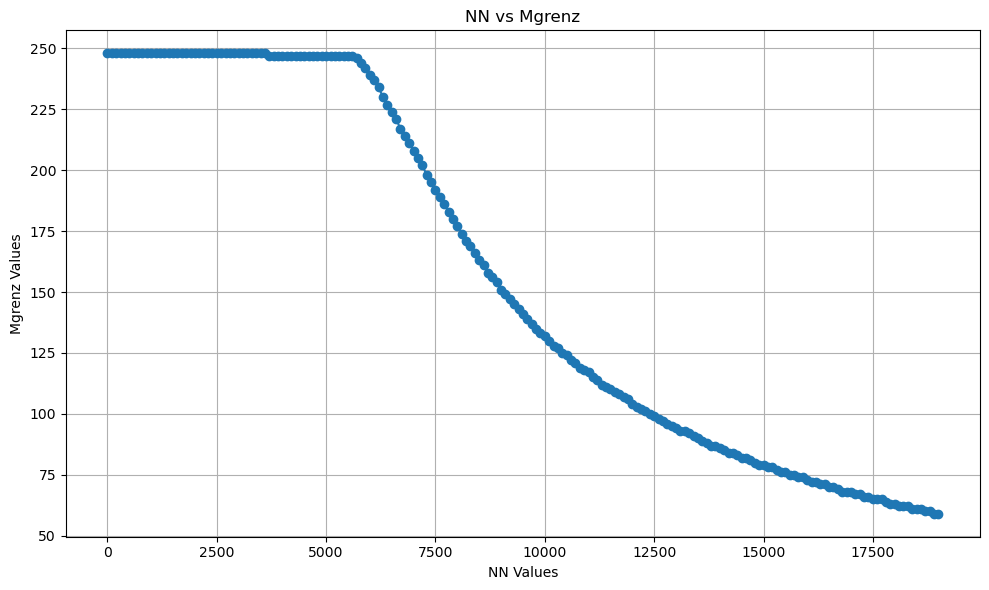

In [4]:
plot_kpi2d(nn_kpi2d, mgrenz_kpi2d)

Plot Exploration of a 3d KPI -ETA

In [5]:
nn_kpi3d = read_file_kpi3d(file_path, 'NN')
mm_kpi3d = read_file_kpi3d(file_path, 'MM')
eta_kpi3d = read_file_kpi3d(file_path, 'ETA')

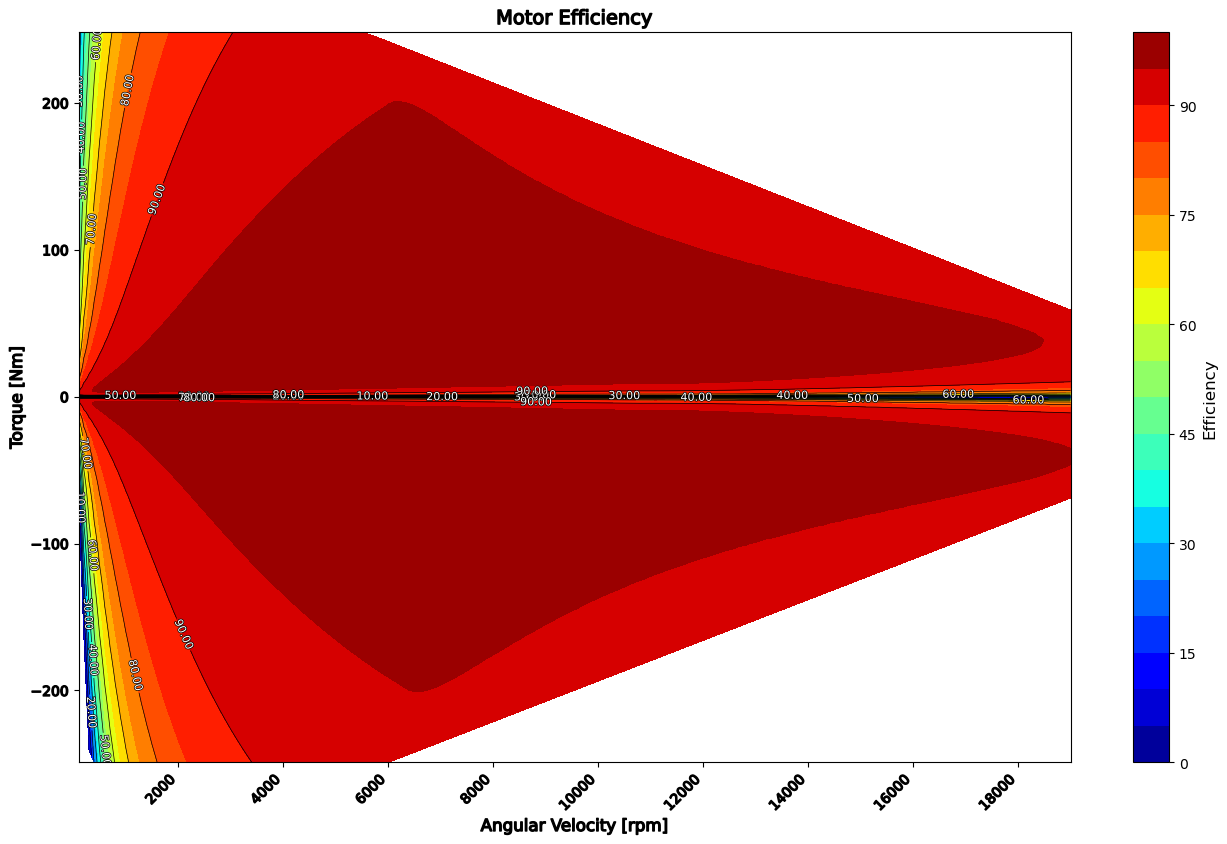

In [6]:
plot_kpi3d(nn_kpi3d, mm_kpi3d, eta_kpi3d)

HeteroGeneous Graph Dataset creation

In [7]:
from src.dataset_creation import HeterogeneousGraphDataset

/home/k64889/miniconda3/envs/thesis/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Creating dataset...
Starting process method


Processing files: 100%|██████████| 10/10 [07:16<00:00, 43.61s/it]


Finished process method
Visualizing sample heterograph


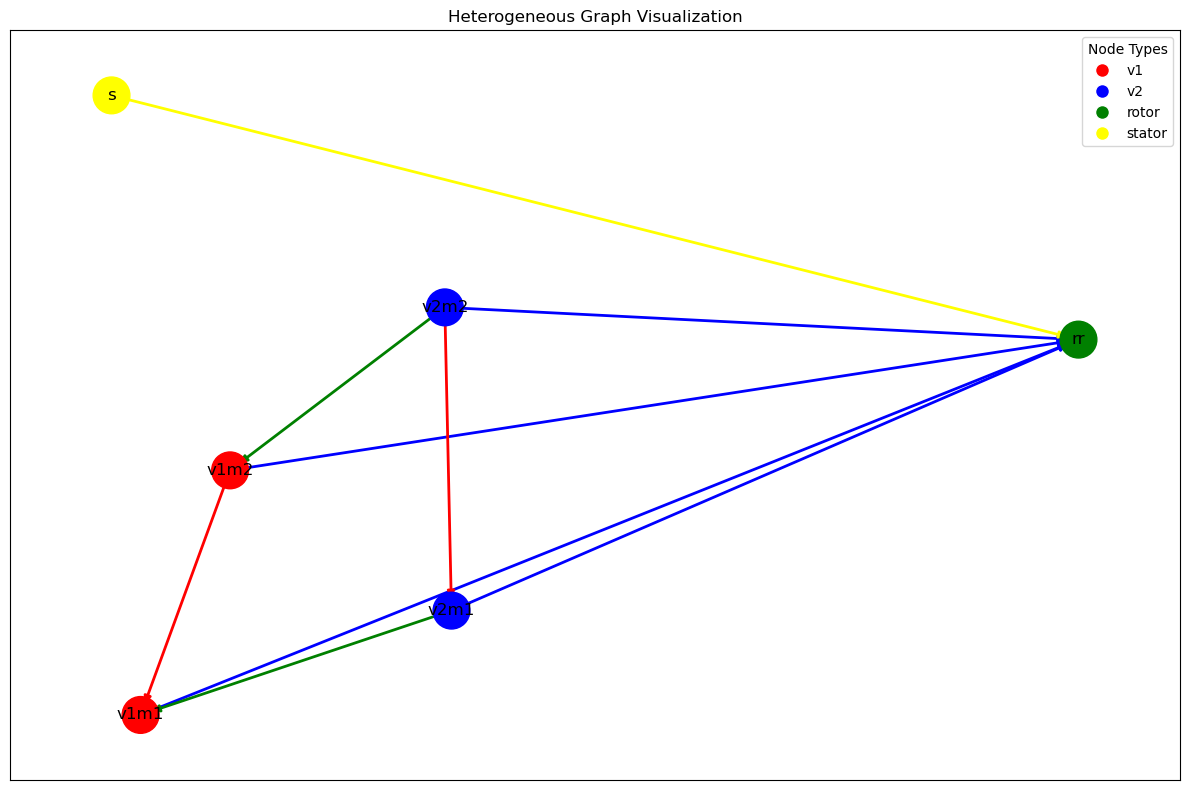

Dataset creation completed.
Dataset contains 10 graphs
Each graph has the following attributes:
HeteroData(
  global_attr=[3],
  y=[191],
  v1={ x=[2, 19] },
  v2={ x=[2, 19] },
  rotor={ x=[1, 0] },
  stator={ x=[1, 12] },
  (v1, v_rotor, rotor)={
    edge_index=[2, 4],
    edge_attr=[1, 1],
  },
  (v1, vm1_vm2, v1)={
    edge_index=[2, 2],
    edge_attr=[1, 1],
  },
  (v2, v1_v2, v1)={
    edge_index=[2, 2],
    edge_attr=[1, 1],
  },
  (stator, stator_rotor, rotor)={
    edge_index=[2, 1],
    edge_attr=[1, 1],
  }
)


In [8]:
# Use force_process as False else it takes too much time to process the files again
print("Creating dataset...")
dataset = HeterogeneousGraphDataset(root='/home/k64889/Masters-Thesis/data',force_process=True)
print("Dataset creation completed.")


In [10]:
print(f"Dataset contains {len(dataset)} graphs")
print(f"Each graph has the following attributes:")
print(dataset[0])

Dataset contains 10 graphs
Each graph has the following attributes:
HeteroData(
  global_attr=[3],
  y=[191],
  v1={ x=[2, 19] },
  v2={ x=[2, 19] },
  rotor={ x=[1, 0] },
  stator={ x=[1, 12] },
  (v1, v_rotor, rotor)={
    edge_index=[2, 4],
    edge_attr=[1, 1],
  },
  (v1, vm1_vm2, v1)={
    edge_index=[2, 2],
    edge_attr=[1, 1],
  },
  (v2, v1_v2, v1)={
    edge_index=[2, 2],
    edge_attr=[1, 1],
  },
  (stator, stator_rotor, rotor)={
    edge_index=[2, 1],
    edge_attr=[1, 1],
  }
)


In [9]:
dataset.inspect_dataset()

Dataset contains 10 graphs

Detailed information for the first graph:

Node Types and Features:
  v1: 2 nodes, 19 features
    Sample features: tensor([ 0.0077,  0.0028, -0.0005,  0.0029,  0.0021])...
  v2: 2 nodes, 19 features
    Sample features: tensor([ 0.0177,  0.0036, -0.0003,  0.0055,  0.0028])...
  rotor: 1 nodes, 0 features
    Sample features: tensor([])...
  stator: 1 nodes, 12 features
    Sample features: tensor([0.0050, 0.0045, 0.0010, 0.0108, 0.0010])...

Edge Types and Structure:
  ('v1', 'v_rotor', 'rotor'): 4 edges
    Edge indices: tensor([[0, 1, 2, 3],
        [4, 4, 4, 4]])
    Edge features: 1 dimensions
    Sample edge features: tensor([0.])...
  ('v1', 'vm1_vm2', 'v1'): 2 edges
    Edge indices: tensor([[1, 3],
        [0, 2]])
    Edge features: 1 dimensions
    Sample edge features: tensor([0.])...
  ('v2', 'v1_v2', 'v1'): 2 edges
    Edge indices: tensor([[2, 3],
        [0, 1]])
    Edge features: 1 dimensions
    Sample edge features: tensor([0.])...
  ('st